In [9]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [95]:
from TAMUDDMDriver import DDMdriver

In [200]:
mod = DDMdriver.DDM()

# mod.ellipse_fracture(0.5,0.001)
mod.Poisson_Ratio = 0.3
mod.frac_element_half_length = 2.0
mod.well_path_Z_begin = 2100
mod.well_path_Z_end = 2100

mod.ellipse_fracture(0.5,0.001)

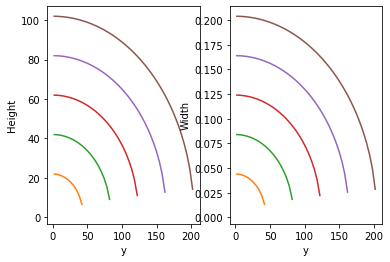

In [201]:
mod.draw_fracture()

In [207]:
input_file = './input.am'
output_file = './Outputs/MonitorWell_1.dat'

mod.output(input_file)

File saved at: ./input.am


In [208]:
DDMdriver.run_model()

Process terminated


In [209]:
DDMdriver.check_model_run(input_file,output_file)

N = 12200


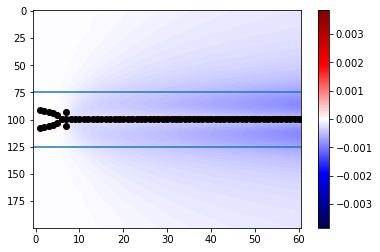

In [210]:

t,d,data = DDMdriver.read_output(output_file)

peaks = np.array(DDMdriver.find_peaks(data))

plt.figure()
plt.imshow(data.T,cmap = 'seismic',aspect = 'auto')
plt.plot(peaks[:,0],peaks[:,1],'ko')
plt.axhline(y=75)
plt.axhline(y=125)
plt.colorbar()
cx = np.array([-1,1])
scale = np.std(data)*1
plt.clim(cx * scale)